In [1]:
%matplotlib inline 
import matplotlib
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
import pandas

In [3]:
sns.set_style('white')
sns.set_palette('colorblind')

In [4]:
DATASET_LOCATION = "../../data/assisstments2010/skill_builder_data_corrected.csv"

In [5]:
dataset = pandas.read_csv(DATASET_LOCATION)

/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
important_columns = ['order_id', 'assignment_id', 'user_id', 'problem_id', 'sequence_id', 'correct', 'skill_id']

In [7]:
dataset[important_columns][:10]

,order_id,assignment_id,user_id,problem_id,sequence_id,correct,skill_id
0,33022537,277618,64525,51424,5948,1,1.0
1,33022709,277618,64525,51435,5948,1,1.0
2,35450204,220674,70363,51444,5948,0,1.0
3,35450295,220674,70363,51395,5948,1,1.0
4,35450311,220674,70363,51481,5948,0,1.0
5,35450555,220674,70363,51457,5948,1,1.0
6,35450573,220674,70363,51459,5948,1,1.0
7,35480603,220674,70363,51408,5948,1,1.0
8,33140811,220674,70677,51453,5948,1,1.0
9,33140919,220674,70677,51397,5948,1,1.0


Do we have duplicate order ids?

In [8]:
dataset.order_id.unique().shape[0] != dataset.shape[0]

True

This means there still are duplicate rows for problems with more than one skill associated.

In [9]:
dataset[['order_id', 'problem_id', 'user_id']].groupby('order_id').user_id.nunique().max()

1

In [10]:
dataset.drop_duplicates(subset=['order_id'], keep='first', inplace=True)

General
----

Total number of unique interactions:

In [11]:
dataset.shape[0]

346860

Students
----
The total number of students is:

In [12]:
dataset['user_id'].unique().shape[0]

4217

The distribution of the number of interactions per student is:

In [13]:
counts_by_user = dataset[['user_id', 'correct', 'order_id']].groupby(['correct', 'user_id']).count()
counts_by_user[:10]

order_id
correct user_id          
0       14             18
        21825           5
        51933           1
        51950           1
        52613           2
        53167          91
        54318           4
        58161           6
        64525          91
        64535           5

Some staticstics about the distribution of number of interactions per student

In [17]:
print 'Max number of interactions', counts_by_user.max()[0]
print 'Students with more than 500 interaction', counts_by_user[counts_by_user.order_id > 500].shape[0]
print 'Students with more than 200 interaction', counts_by_user[counts_by_user.order_id > 200].shape[0]

Max number of interactions 889
Students with more than 500 interaction 121
Students with more than 200 interaction 362


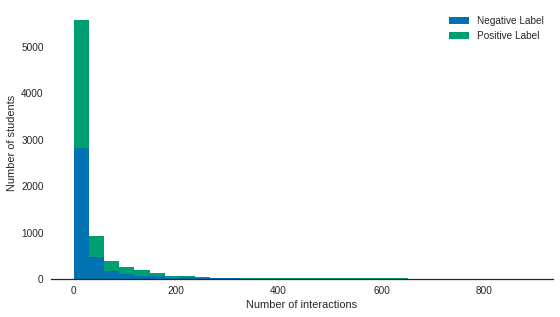

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.hist([counts_by_user.loc[0].order_id.values, counts_by_user.loc[1].order_id.values],
         bins=30, stacked=True, rwidth=1.0, label=['Negative Label', 'Positive Label'])
ax.legend()
ax.set_xlabel('Number of interactions')
ax.set_ylabel('Number of students')
sns.despine(left=True)

Problems
----

In [15]:
dataset.problem_id.unique().shape[0]

26688

In [54]:
counts_by_problem = dataset[['problem_id', 'correct', 'order_id']].groupby(['correct', 'problem_id']).count()
counts_by_problem[:10]

order_id
correct problem_id          
0       83                 2
        84                 4
        85                 4
        86                15
        249                1
        250                1
        251                1
        252                8
        807                7
        808                7

Number of problems sorted by frequency

In [58]:
dataset.problem_id.value_counts().value_counts()

1      2925
2      2386
4      1894
3      1762
6      1443
5      1424
8      1145
7      1065
9       929
10      915
12      783
11      697
14      617
13      565
16      531
15      485
18      393
17      383
20      352
19      312
22      303
21      296
24      283
26      216
23      213
28      190
30      188
32      184
25      170
27      167
       ... 
182       1
158       1
174       1
250       1
234       1
166       1
150       1
129       1
107       1
161       1
210       1
220       1
218       1
164       1
119       1
236       1
228       1
260       1
226       1
194       1
225       1
178       1
162       1
146       1
262       1
155       1
123       1
121       1
230       1
159       1
Name: problem_id, dtype: int64

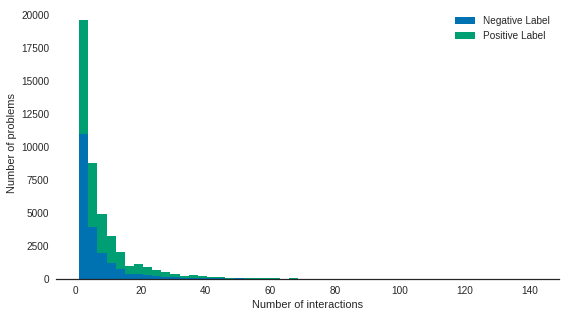

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.hist([counts_by_problem.loc[0].order_id.values, counts_by_problem.loc[1].order_id.values],
         bins=50, stacked=True, rwidth=1.0, label=['Negative Label', 'Positive Label'])
ax.legend()
ax.set_xlabel('Number of interactions')
ax.set_ylabel('Number of problems')
sns.despine(left=True)

Skills
----
This has to be run with the dataset WITH duplicates, or the merged skills dataset

In [26]:
dataset.skill_id.unique().shape[0]

124

In [27]:
counts_by_skill = dataset[['skill_id', 'correct', 'order_id']].groupby(['correct', 'skill_id']).count()
counts_by_skill[:10]

order_id
correct skill_id          
0       1.0            977
        2.0           2960
        4.0            522
        5.0            768
        8.0            243
        9.0           1230
        10.0          1785
        11.0          1693
        12.0          1392
        13.0          1987

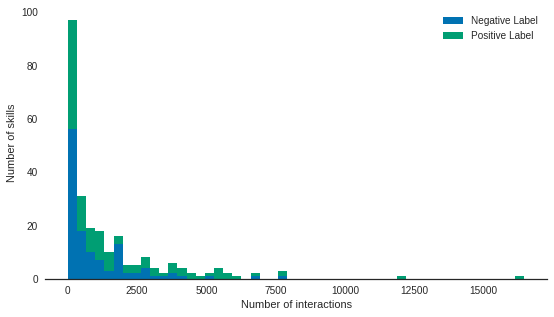

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.hist([counts_by_skill.loc[0].order_id.values, counts_by_skill.loc[1].order_id.values],
         bins=50, stacked=True, rwidth=1.0, label=['Negative Label', 'Positive Label'])
ax.legend()
ax.set_xlabel('Number of interactions')
ax.set_ylabel('Number of skills')
sns.despine(left=True)

Correlations
====

In [143]:
from sklearn import metrics

Baseline of student mode prediction
---

In [140]:
student_mode = dataset[['user_id', 'correct']].groupby(by='user_id').apply(pandas.DataFrame.mode)

student_mode.index = student_mode.index.droplevel(1)

student_mode = student_mode.drop('user_id', 1).reset_index().rename(
    columns={'correct': 'prediction'})

In [142]:
prediction_student_mode = dataset[['order_id', 'user_id', 'correct']].merge(student_mode)
prediction_student_mode

,order_id,user_id,correct,prediction
0,33022537,64525,1,1.0
1,33022709,64525,1,1.0
2,28186893,64525,1,1.0
3,28187093,64525,1,1.0
4,32413158,64525,1,1.0
5,33022751,64525,0,1.0
6,33023039,64525,1,1.0
7,33023131,64525,1,1.0
8,33023183,64525,1,1.0
9,33023245,64525,0,1.0


In [147]:
print metrics.classification_report(
    prediction_student_mode.correct, prediction_student_mode.prediction.fillna(0).astype(int))

             precision    recall  f1-score   support

          0       0.65      0.29      0.40    123825
          1       0.70      0.91      0.79    224627

avg / total       0.68      0.69      0.65    348452



In [150]:
metrics.mean_squared_error(
    prediction_student_mode.correct, prediction_student_mode.prediction.fillna(0).astype(int))

0.30837819843192177

In [177]:
metrics.roc_auc_score(
    prediction_student_mode.correct, prediction_student_mode.prediction.fillna(0).astype(int))

0.60219909127393656

Baseline with problem mode prediction
---

In [151]:
problem_mode = dataset[['problem_id', 'correct']].groupby(by='problem_id').apply(pandas.DataFrame.mode)

problem_mode.index = problem_mode.index.droplevel(1)

problem_mode = problem_mode.drop('problem_id', 1).reset_index().rename(
    columns={'correct': 'prediction'})

In [156]:
prediction_problem_mode = dataset[['order_id', 'problem_id', 'correct']].merge(problem_mode)
prediction_problem_mode

,order_id,problem_id,correct,prediction
0,33022537,51424,1,1.0
1,35517819,51424,1,1.0
2,31390687,51424,1,1.0
3,31386114,51424,1,1.0
4,32238361,51424,1,1.0
5,30454021,51424,0,1.0
6,35407964,51424,1,1.0
7,35410508,51424,1,1.0
8,35396255,51424,1,1.0
9,35256376,51424,1,1.0


In [157]:
print metrics.classification_report(
    prediction_problem_mode.correct, prediction_problem_mode.prediction.fillna(0).astype(int))

             precision    recall  f1-score   support

          0       0.65      0.45      0.53    127017
          1       0.74      0.86      0.80    227496

avg / total       0.71      0.72      0.70    354513



In [179]:
metrics.roc_auc_score(
    prediction_problem_mode.correct, prediction_problem_mode.prediction.fillna(0).astype(int))

0.65892859860448683

Spliting by sequence
---

In [197]:
groups = dataset[important_columns].groupby('user_id')
splitted = [groups.get_group(x) for x in groups.groups]

In [198]:
splitted[0].sort_values(by='order_id', inplace=True)

/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [200]:
ss = splitted[0]

In [209]:
ss['next_exercise'] = ss.problem_id.shift(-1).fillna(0).astype(int)
ss['next_correct'] = ss.correct.shift(-1).fillna(0).astype(int)

/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [244]:
from sklearn.preprocessing import OneHotEncoder
vect = OneHotEncoder()
vect.fit_transform(ss[['problem_id']])

<40x40 sparse matrix of type '<type 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [255]:
pr = vect.transform(ss[['problem_id']])

In [258]:
pr.indices

array([38, 39, 36, 37, 30, 31, 20, 21, 22, 23, 32, 33, 26, 27, 24, 25, 34,
       35, 28, 29,  9,  6,  4,  0,  5,  7,  1,  8,  3,  2, 13, 14, 12, 15,
       19, 18, 16, 11, 17, 10], dtype=int32)

In [269]:
np.roll(pr.indices, -1)

array([39, 36, 37, 30, 31, 20, 21, 22, 23, 32, 33, 26, 27, 24, 25, 34, 35,
       28, 29,  9,  6,  4,  0,  5,  7,  1,  8,  3,  2, 13, 14, 12, 15, 19,
       18, 16, 11, 17, 10, 38], dtype=int32)

Baseline with skill mode prediction
---

In [13]:
dataset[['order_id', 'user_id', 'problem_id', 'skill_id', 'skill_name']][:10]

,order_id,user_id,problem_id,skill_id,skill_name
0,33022537,64525,51424,1.0,Box and Whisker
1,33022709,64525,51435,1.0,Box and Whisker
2,35450204,70363,51444,1.0,Box and Whisker
3,35450295,70363,51395,1.0,Box and Whisker
4,35450311,70363,51481,1.0,Box and Whisker
5,35450555,70363,51457,1.0,Box and Whisker
6,35450573,70363,51459,1.0,Box and Whisker
7,35480603,70363,51408,1.0,Box and Whisker
8,33140811,70677,51453,1.0,Box and Whisker
9,33140919,70677,51397,1.0,Box and Whisker


In [14]:
skill_mode = dataset[['skill_id', 'correct']].groupby(by='skill_id').apply(pandas.DataFrame.mode)

skill_mode.index = skill_mode.index.droplevel(1)

skill_mode = skill_mode.drop('skill_id', 1).reset_index().rename(
    columns={'correct': 'prediction'})

In [15]:
prediction_skill_mode = dataset[['order_id', 'skill_id', 'correct']].merge(skill_mode)
prediction_skill_mode

,order_id,skill_id,correct,prediction
0,33022537,1.0,1,1
1,33022709,1.0,1,1
2,35450204,1.0,0,1
3,35450295,1.0,1,1
4,35450311,1.0,0,1
5,35450555,1.0,1,1
6,35450573,1.0,1,1
7,35480603,1.0,1,1
8,33140811,1.0,1,1
9,33140919,1.0,1,1


In [18]:
print metrics.classification_report(
    prediction_skill_mode.correct, prediction_skill_mode.prediction.fillna(0).astype(int))

             precision    recall  f1-score   support

          0       0.57      0.10      0.17     96783
          1       0.67      0.96      0.79    186322

avg / total       0.64      0.67      0.58    283105



In [20]:
metrics.roc_auc_score(
    prediction_skill_mode.correct, prediction_skill_mode.prediction.fillna(0).astype(int))

0.52954772787262827

----

In [11]:
new_dataset = pandas.read_csv('../../data/assisstments2010/processed/merged_skills.csv')

/home/milagro/anaconda2/envs/edm_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
new_dataset.template_id.unique().shape, new_dataset.shape

((816,), (346860, 33))

In [32]:
new_dataset[['user_id', 'order_id', 'template_id', 'new_skill_id', 'problem_id', 'correct']][:10]

,user_id,order_id,template_id,new_skill_id,problem_id,correct
0,73963,20224085,31690,1,76429,0
1,73963,20224095,31690,1,76430,1
2,73963,20224113,31690,1,76431,1
3,73963,20224123,31690,1,76432,1
4,73963,20224142,31690,1,76433,0
5,73963,20224159,31690,1,76434,0
6,73963,20224180,31690,1,76339,0
7,73963,20224183,31690,1,76340,0
8,73963,20224187,31690,1,76341,1
9,73963,20224190,31690,1,76342,1


In [42]:
template = 50237

In [43]:
new_dataset[new_dataset.template_id==template].shape

(485, 33)

In [44]:
new_dataset[new_dataset.template_id==template].problem_id.unique().shape

(40,)

In [45]:
new_dataset[['user_id', 'template_id', 'order_id']].groupby(['user_id', 'template_id']).count()

order_id
user_id template_id          
14      30397               6
        30790               5
        50196               2
        50237               2
        52445               3
        52570               6
        52571               1
21825   29925               2
        29926               2
        30015               1
        30017               4
        30244               7
        30369               1
        31001               1
        36483               4
51933   57330               1
51950   54581               1
        55506               1
        55509               2
        55833               1
        55836               1
52613   29913               1
        30677               1
        32885               1
        58207               1
        58212               1
        58215               1
53167   29863               2
        29866               2
        29868               5
...                       ...
96299   46278               4
        46279               4
        46280               2
        46281               2
        46285               4
        46338               1
        47535               3
        47637               5
        47763               1
        47965               1
        48523               1
        49982               1
        50006               4
        52619               1
        52620               2
        52621               1
        54260               1
        54274               3
        54317               2
        54581               1
        54699               1
        55506               1
        55691               4
        55692               7
        55693               5
        55833              13
        55834              10
        55835              10
        55836               9
        55901              57

[99513 rows x 1 columns]

In [50]:
students_for_template = new_dataset[new_dataset.template_id==template].user_id.unique()
students_for_template.shape, new_dataset.user_id.unique().shape

((257,), (4217,))

In [47]:
new_dataset.set_index('user_id').loc[students_for_template].shape 

(70214, 32)

In [48]:
new_dataset.set_index('user_id').loc[students_for_template].problem_id.unique().shape

(15544,)

In [51]:
dataset[:10]

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.0,3,3
5,35450555,220674,70363,33172,51457,1,1,1,16031,tutor,...,0,4,16031,30060,NaN,12,0,NaN,4,4
6,35450573,220674,70363,33174,51459,1,1,1,15047,tutor,...,0,4,15047,30060,NaN,6,0,NaN,5,5
7,35480603,220674,70363,33123,51408,1,1,1,10732,tutor,...,0,3,10732,30059,NaN,55,0,NaN,6,6
8,33140811,220674,70677,33168,51453,1,1,1,23241,tutor,...,0,4,23241,30060,NaN,12,0,NaN,1,1
9,33140919,220674,70677,33112,51397,1,1,1,11512,tutor,...,0,2,11512,30059,NaN,36,0,NaN,2,2
